In [1]:
import os
os.environ['USE_PYGEOS'] = '0' # only if you have pygeos

import geopandas as gpd
from  fiona import listlayers

#maps
worldMaps='https://github.com/CienciaDeDatosEspacial/code_and_data/raw/main/maps/worldMaps.gpkg'

#layers in maps
listlayers(worldMaps)

['countries', 'cities', 'rivers']

In [2]:
countries=gpd.read_file(worldMaps,layer='countries')
cities=gpd.read_file(worldMaps,layer='cities')
rivers=gpd.read_file(worldMaps,layer='rivers')

In [3]:
countries.crs.to_epsg()==cities.crs.to_epsg()==rivers.crs.to_epsg()

True

<Axes: >

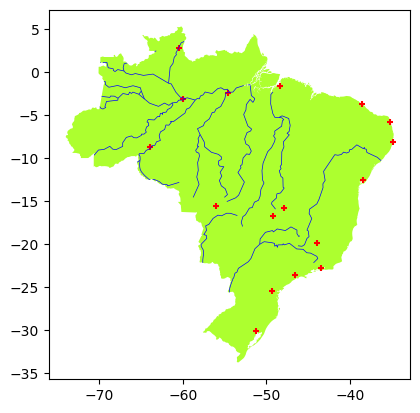

In [4]:
# just brazil
brazil=countries[countries.COUNTRY=='Brazil']

# clipping
brazil_cities= gpd.clip(gdf=cities,mask=brazil)
brazil_rivers = gpd.clip(gdf=rivers,mask=brazil)

# plotting
base = brazil.plot(facecolor="greenyellow")
brazil_rivers.plot(edgecolor='blue', linewidth=0.5,ax=base)
brazil_cities.plot(marker='+', color='red', markersize=15,ax=base)

In [5]:
#let's see some important pre processing operation

In [6]:
#1) REPROJECTIN

# unit is in degrees:
brazil.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [7]:
# centroid
brazil.centroid

C:\Users\thiag\AppData\Local\Temp\ipykernel_128\515368123.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  brazil.centroid


29    POINT (-53.09009 -10.77302)
dtype: geometry

In [8]:
#A projected CRS will have units in meters or feet (or similar):

brazil.to_crs(3587).crs.axis_info

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [9]:
# operations that require projected CRS will work:
brazil.to_crs(3587).centroid

29    POINT (11374671.933 -6303368.608)
dtype: geometry

<Axes: >

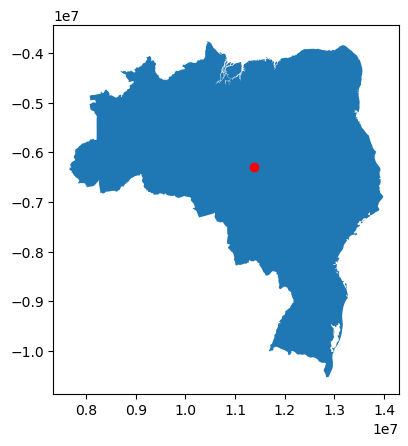

In [10]:
# plot this projected version

base3587=brazil.to_crs(3587).plot()
brazil.to_crs(3587).centroid.plot(color='red',ax=base3587)

In [11]:
#We use the crs 3587 as an emergency option to reproject a map. 
#However, for a more accurate option it is better to look for the 
#ones explicitly prepared for a particular locations of the world. 
#You can request a crs per country here:

# recommended for Brazil (meters)
brazil.to_crs(5641).crs.axis_info

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [12]:
# this works
brazil.to_crs(5641).centroid

29    POINT (3884486.179 8756856.093)
dtype: geometry

<Axes: >

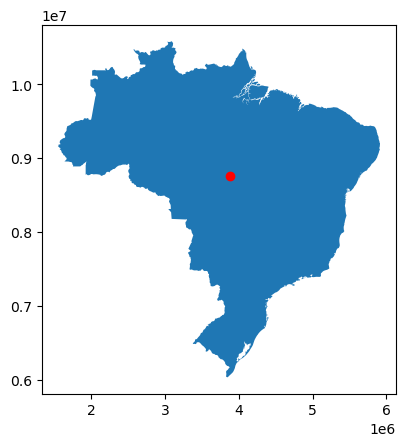

In [13]:
# replotting:

base5641=brazil.to_crs(5641).plot()
brazil.to_crs(5641).centroid.plot(color='red',ax=base5641)

C:\Users\thiag\AppData\Local\Temp\ipykernel_128\2467806856.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  brazil.centroid.plot(color='red',ax=ax2)


<Axes: title={'center': 'unprojected'}>

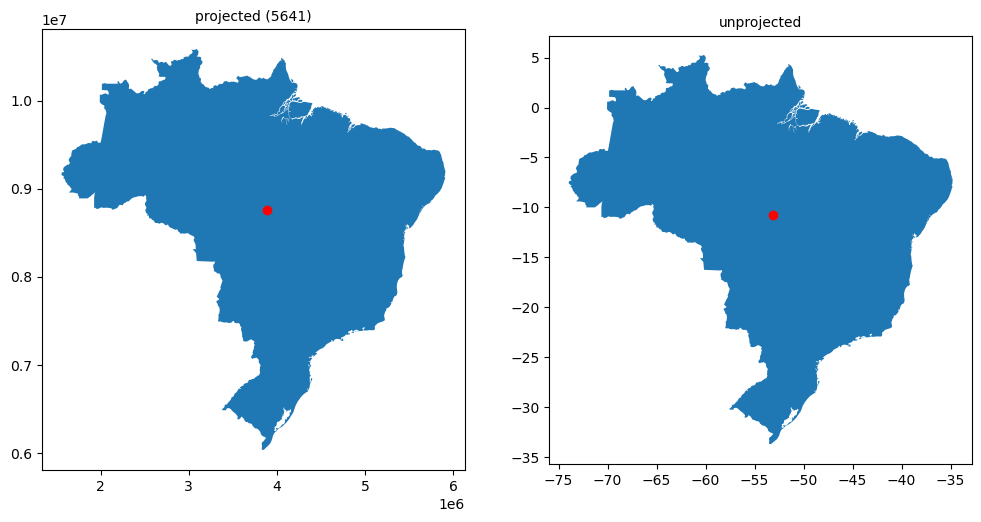

In [14]:
# Not using the right projection will give you a wrong numerical 
#result when needing numerical accuracy; however, you might find 
#situation where the visual output seems right (yet it is wrong):

from matplotlib import pyplot

fig, (ax1, ax2) = pyplot.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

ax1.set_title('projected (5641)',fontsize=10)
brazil.to_crs(5641).plot(ax=ax1)
brazil.to_crs(5641).centroid.plot(color='red',ax=ax1)

ax2.set_title('unprojected',fontsize=10)
brazil.plot(ax=ax2)
brazil.centroid.plot(color='red',ax=ax2)

In [15]:
#Let's keep the projected version for all our maps:

brazil_5641=brazil.to_crs(5641)
# just Brazil

cities_5641=cities.to_crs(brazil_5641.crs)
cities_5641=cities_5641[cities_5641.COUNTRY=='Brazil']

rivers_5641=rivers.to_crs(brazil_5641.crs)
rivers_5641=gpd.clip(gdf=rivers_5641,mask=brazil_5641)

In [16]:
#We could save these maps on Brazil:

# saving 
import os

brazil_5641.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='country', driver="GPKG")
cities_5641.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='cities', driver="GPKG")
rivers_5641.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='rivers', driver="GPKG")

DriverError: sqlite3_open(maps\brazilMaps_5641.gpkg) failed: unable to open database file